In [95]:
import pandas as pd
import json
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from urllib.request import Request, urlopen
from IPython.display import Image
pd.options.display.max_columns = 100

## GATHER

#### Gathering the tweet-json file

In [2]:
with open('/Users/braul/OneDrive/Escritorio/Udacity/P4/tweet-json.txt') as file:
    data = [json.loads(line) for line in file]
tweets = pd.DataFrame(data)

In [3]:
tweets.shape

(2354, 31)

#### Gathering the image-predictions tsv file

In [6]:
url = 'https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv'
response = requests.get(url).text
images = pd.read_csv(StringIO(response), sep='\t')

In [500]:
images.shape

(2075, 12)

#### Gathering the twitter-archive-enhanced file

In [7]:
twt_enhanced = pd.read_csv('/Users/braul/OneDrive/Escritorio/Udacity/P4/twitter-archive-enhanced-2.csv')

In [502]:
twt_enhanced.shape

(2356, 17)

## ASSESS

##### Let's do a visual assessment 

In [503]:
#Quick inspection of the data
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [79]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2017,880095782870896641,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,1,miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True
1532,789628658055020548,https://pbs.twimg.com/media/CvVTEnPXYAAWLyL.jpg,1,chow,0.260702,True,cougar,0.088143,False,Pomeranian,0.079883,True
1601,799774291445383169,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True
1811,832998151111966721,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,1,boxer,0.539036,True,French_bulldog,0.317617,True,bull_mastiff,0.093928,True
1531,789599242079838210,https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg,2,Chesapeake_Bay_retriever,0.878822,True,beagle,0.018570,True,Labrador_retriever,0.017499,True


In [72]:
twt_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [56]:
# Looks like the column ID on tweets is the same tweet_id on images and twt_enhanced, if that´s the case col should be rename
tweets[tweets.id == 892420643555336193]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN


In [58]:
twt_enhanced[twt_enhanced.tweet_id == 892420643555336193]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [85]:
# Doggo, Puppo, floofer, pupper are different values of the same variable= the good boys
twt_enhanced[twt_enhanced.puppo == 'puppo']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,None,None,None,puppo
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
398,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo


In [55]:
# This demonstrate that the id is a unique value in the dataframe
tweets[tweets.id.duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


##### Now, programmatic assesment

In [37]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [38]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
twt_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
#Duplicated columns on all archives
dup_cols = pd.Series(list(tweets) + list(images) + list(twt_enhanced))
dup_cols[dup_cols.duplicated()]

43                 tweet_id
44    in_reply_to_status_id
45      in_reply_to_user_id
47                   source
dtype: object

In [51]:
#To know if there is any duplicated tweet_id we should check on the tweets dataframe
twt_enhanced[twt_enhanced.tweet_id.duplicated()].value_counts()

Series([], dtype: int64)

In [52]:
images[images.tweet_id.duplicated()].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [63]:
images.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
banana                  1
killer_whale            1
boathouse               1
tick                    1
water_bottle            1
Name: p1, Length: 378, dtype: int64

In [81]:
twt_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [74]:
twt_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [82]:
tweets.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [89]:
tweets['in_reply_to_status_id_str'].value_counts()

667152164079423490    2
879553827334172678    1
813127251579564032    1
838085539362402305    1
747648653817413632    1
                     ..
674752233200820224    1
772743019447607296    1
863425645568774144    1
674999807681908736    1
703255935813287936    1
Name: in_reply_to_status_id_str, Length: 77, dtype: int64

In [87]:
tweets['lang'].value_counts()

en     2336
und       7
in        3
nl        3
et        1
es        1
tl        1
ro        1
eu        1
Name: lang, dtype: int64

#### Quality
##### `tweets table`
- The column 'id' is the same as tweet_id on images and twt_enheanced tables
- The  'id' and 'id str' columns have the same information
- The columns: geo, coordinates, contributors are empty. The column 'place' brings just one value
- The created_at column  is an object, should be a date type
- in_reply_to_status_id_str and in_reply_to_status_id have the same information
- in_reply_to_status_id is a float and must be a integer
- in_reply_to_status_id_str and in_reply_to_status_id have the same information
- in_reply_to_status_id is a float and must be an integer

#### `images table`
- In P1, P2, P3 some values are capitalize and others are not

#### `twt_enheanced table`
- The timestamp's column datatype is object instead of a datetime type
- The rating denominator has different values instead of 10


#### Tidiness
#### `twt_enheanced table`
- Real source can be extract from the column 'extract' 
- Four variables in twt_enhanced table (doggo, floofer, pupper, puppo)
- Direct access to the tweet can be make by extracting it from 'text'

## CLEAN

In [8]:
#Before cleaning is important to do a copy of the dataframes so we can do the process without messing up the original data.
tweets_clean = tweets.copy()
images_clean = images.copy()
twt_clean = twt_enhanced.copy()

In [505]:
tweets_clean.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN


In [260]:
tweets.shape

(2354, 31)

In [261]:
images_clean.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.02397,False


In [262]:
images.shape

(2075, 12)

In [263]:
twt_clean.tail(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [264]:
twt_clean.shape

(2356, 17)

### Missing data

#### `twt_enheanced table`: The column 'id' is the same as tweet_id on images and twt_enheanced tables

##### Define: 
            Change the name of the 'id' column in order to have an unified standar trough the dataframes

##### Code:

In [9]:
tweets_clean.rename(columns= {'id':'tweet_id'}, inplace=True)

##### Test:

In [10]:
list(tweets_clean)

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

##### Define:
            The column 'id_str' has to be drop, it has the same information that 'tweet_id' (ex: id)

##### Code:

In [11]:
tweets_clean.drop(['id_str'], axis=1, inplace=True)

##### Test

In [12]:
tweets_clean.head(1)

,created_at,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN


In [13]:
tweets_clean.shape

(2354, 30)

##### Define:
            geo, coordinates, contributors and place are going to be delete from the dataframe

##### Code:

In [14]:
tweets_clean.drop(['geo', 'coordinates', 'place', 'contributors'], axis=1, inplace=True)

##### Test:

In [15]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   tweet_id                       2354 non-null   int64  
 2   full_text                      2354 non-null   object 
 3   truncated                      2354 non-null   bool   
 4   display_text_range             2354 non-null   object 
 5   entities                       2354 non-null   object 
 6   extended_entities              2073 non-null   object 
 7   source                         2354 non-null   object 
 8   in_reply_to_status_id          78 non-null     float64
 9   in_reply_to_status_id_str      78 non-null     object 
 10  in_reply_to_user_id            78 non-null     float64
 11  in_reply_to_user_id_str        78 non-null     object 
 12  in_reply_to_screen_name        78 non-null     o

##### Define:
            Convert the data so the column become a data type in format: year/month/day

##### Code:

In [16]:
tweets_clean['created_at'] = tweets_clean['created_at'].str.replace(r'(?:\d{2}:\d{2}:\d{2}\s\+0{4}\s)|(^[A-Za-z]+)', '')

In [17]:
tweets_clean['created_at']

0        Aug 01 2017
1        Aug 01 2017
2        Jul 31 2017
3        Jul 30 2017
4        Jul 29 2017
            ...     
2349     Nov 16 2015
2350     Nov 16 2015
2351     Nov 15 2015
2352     Nov 15 2015
2353     Nov 15 2015
Name: created_at, Length: 2354, dtype: object

In [18]:
tweets_clean['created_at'] = pd.to_datetime(tweets_clean['created_at'], format= ' %b %d %Y')

##### Test:

In [19]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   created_at                     2354 non-null   datetime64[ns]
 1   tweet_id                       2354 non-null   int64         
 2   full_text                      2354 non-null   object        
 3   truncated                      2354 non-null   bool          
 4   display_text_range             2354 non-null   object        
 5   entities                       2354 non-null   object        
 6   extended_entities              2073 non-null   object        
 7   source                         2354 non-null   object        
 8   in_reply_to_status_id          78 non-null     float64       
 9   in_reply_to_status_id_str      78 non-null     object        
 10  in_reply_to_user_id            78 non-null     float64       
 11  in_reply_to_user_

In [20]:
tweets_clean['created_at'].head()

0   2017-08-01
1   2017-08-01
2   2017-07-31
3   2017-07-30
4   2017-07-29
Name: created_at, dtype: datetime64[ns]

##### Define:
                Delete one of the two tables with duplicated information

##### Code:

In [21]:
tweets_clean.drop(['in_reply_to_status_id_str'], axis=1, inplace=True)

##### Test:

In [22]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   created_at                     2354 non-null   datetime64[ns]
 1   tweet_id                       2354 non-null   int64         
 2   full_text                      2354 non-null   object        
 3   truncated                      2354 non-null   bool          
 4   display_text_range             2354 non-null   object        
 5   entities                       2354 non-null   object        
 6   extended_entities              2073 non-null   object        
 7   source                         2354 non-null   object        
 8   in_reply_to_status_id          78 non-null     float64       
 9   in_reply_to_user_id            78 non-null     float64       
 10  in_reply_to_user_id_str        78 non-null     object        
 11  in_reply_to_scree

##### Define:
                Delete the table with the string format

##### Code:

In [23]:
tweets_clean.drop(['in_reply_to_user_id_str'], axis=1, inplace=True)

In [24]:
#I just saw the quoted status and decide to drop it too
tweets_clean.drop(['quoted_status_id_str'], axis=1, inplace=True)

##### Test:

In [25]:
list(tweets_clean)

['created_at',
 'tweet_id',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'in_reply_to_screen_name',
 'user',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status']

##### Define:
                Change the float format to integer or both tables

###### Code:

In [26]:
tweets_clean['in_reply_to_status_id'].fillna(0, inplace=True)
tweets_clean['in_reply_to_user_id'].fillna(0, inplace=True)
tweets_clean = tweets_clean.astype({'in_reply_to_status_id': 'int', 'in_reply_to_user_id': 'int'})

In [27]:
type(tweets_clean['in_reply_to_status_id'][1])

numpy.int32

In [28]:
type(tweets_clean['in_reply_to_user_id'][1])

numpy.int32

### Images table

##### Define:
                Lower every letter in columns P1, P2, P3

##### Code:

In [29]:
#First we need to see if the columns are objects or they need to be change first
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
images_clean['p1'] = images_clean['p1'].str.lower()
images_clean['p2'] = images_clean['p2'].str.lower()
images_clean['p3'] = images_clean['p3'].str.lower()

##### Test:

In [31]:
low1 = images_clean['p1'].str.islower()
low1.value_counts()

True    2075
Name: p1, dtype: int64

In [32]:
low2 = images_clean['p2'].str.islower()
low2.value_counts()

True    2075
Name: p2, dtype: int64

In [33]:
low3 = images_clean['p3'].str.islower()
low3.value_counts()

True    2075
Name: p3, dtype: int64

### Twt_enhanced

##### Define:
                Remove the character that are not useful and change the datatype

##### Code:

In [34]:
twt_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [35]:
twt_clean.shape

(2356, 17)

In [36]:
#In this way we know that the 6 last characters are '+0000' and we can remove it to clean the timestamp
st = twt_clean['timestamp'].str[-6:]
st.value_counts()

 +0000    2356
Name: timestamp, dtype: int64

In [37]:
twt_clean['timestamp'] = twt_clean['timestamp'].str[:-6]

In [38]:
twt_clean['timestamp'] = pd.to_datetime(twt_clean['timestamp'], format= '%Y-%m-%d %X')

In [39]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

##### Test:

In [40]:
twt_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

##### Define:
                Convert all values on rating_denominator into 10

##### Code:

In [41]:
twt_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [42]:
twt_clean['rating_denominator'] = 10

##### Test:

In [43]:
twt_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

### TIDINESS

#### `twt_enheanced table`

##### Define:
                Extract the source from the whole string using regular expressions

##### Code:

In [44]:
twt_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [45]:
list_source = []
for i in twt_clean['source']:
    finder = "".join(map(str, re.findall('(?<=\">).{1,}(?=\<)', i)))
    list_source.append(finder)
    print(list_source)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [46]:
df_source = pd.DataFrame(list_source)
df_source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
dtype: int64

In [47]:
twt_clean['source'] = df_source

##### Test:

In [48]:
twt_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [49]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

##### Define:
                Melt the columns doggo, floofer, pupper, puppo into one categorical column call = Doggo_type and the drop the 4                 initial columns
                

##### Code:

In [50]:
#Creating a new dataframe to melt the columns
df_doggo = twt_clean[['tweet_id','doggo', 'floofer', 'pupper','puppo']].copy()

In [51]:
df_doggo.shape

(2356, 5)

In [52]:
df_doggo = pd.melt(df_doggo, id_vars=['tweet_id'], var_name=['variable'], value_name='doggo_type')

In [53]:
df_doggo = df_doggo.drop('variable', axis=1)

In [54]:
df_doggo['doggo_type'] = df_doggo['doggo_type'].replace('None', np.NaN)

In [55]:
df_doggo['doggo_type'].value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: doggo_type, dtype: int64

In [56]:
df_doggo.dropna(inplace=True)

In [57]:
twt_clean = twt_clean.merge(df_doggo, on='tweet_id', how='left')

In [58]:
twt_clean = twt_clean.drop_duplicates(subset=['tweet_id'])

Now that we have melted the columns and merged it with our main dataframe we can drop the original columns 

In [59]:
twt_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test:

In [60]:
twt_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


##### Define:
                Extract the tweet url from 'text' column

In [61]:
twt_clean[twt_clean.tweet_id == 892420643555336193]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


In [62]:
urls = []
for i in twt_clean['text']:
    slicer = "".join(map(str, re.findall('(?=https).{0,}(?<=[A-Za-z])', i)))
    urls.append(slicer)

In [63]:
#Let's have a look to the urls
print(urls[0:4])

['https://t.co/MgUWQ76dJU', 'https://t.co/0Xxu71qeIV', 'https://t.co/wUnZnhtVJB', 'https://t.co/tD36da7qLQ']


In [64]:
df_urls = pd.DataFrame(urls)
df_urls.rename(columns = {0: 'tweet_url'}, inplace=True)

In [65]:
df_urls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_url  2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


In [66]:
twt_clean['tweet_url'] = df_urls['tweet_url']

In [67]:
twt_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo_type,tweet_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://t.co/AtUZn91f7f


### Creating a master file to store all information from the 3 datasets

In this process i'm going to drop all information i don't needed ene though it is not 'dirty', it's just not useful for the analysis

In [68]:
tweets_clean.drop(['full_text', 'truncated', 'display_text_range', 'entities','extended_entities','source',
                   'in_reply_to_status_id','in_reply_to_user_id','in_reply_to_screen_name','user','retweeted_status',
                   'quoted_status_id','quoted_status'], axis=1, inplace=True)

In [70]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   created_at                     2354 non-null   datetime64[ns]
 1   tweet_id                       2354 non-null   int64         
 2   is_quote_status                2354 non-null   bool          
 3   retweet_count                  2354 non-null   int64         
 4   favorite_count                 2354 non-null   int64         
 5   favorited                      2354 non-null   bool          
 6   retweeted                      2354 non-null   bool          
 7   possibly_sensitive             2211 non-null   object        
 8   possibly_sensitive_appealable  2211 non-null   object        
 9   lang                           2354 non-null   object        
dtypes: bool(3), datetime64[ns](1), int64(3), object(3)
memory usage: 135.8+ KB


In [71]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
twt_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                'retweeted_status_timestamp'], axis=1, inplace=True)

In [73]:
twt_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo_type,tweet_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://t.co/AtUZn91f7f


### CREATING ARCHIVE MASTER

    Merging the three cleaned dataframes into one master dataframe

In [80]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   created_at                     2354 non-null   datetime64[ns]
 1   tweet_id                       2354 non-null   int64         
 2   is_quote_status                2354 non-null   bool          
 3   retweet_count                  2354 non-null   int64         
 4   favorite_count                 2354 non-null   int64         
 5   favorited                      2354 non-null   bool          
 6   retweeted                      2354 non-null   bool          
 7   possibly_sensitive             2211 non-null   object        
 8   possibly_sensitive_appealable  2211 non-null   object        
 9   lang                           2354 non-null   object        
dtypes: bool(3), datetime64[ns](1), int64(3), object(3)
memory usage: 135.8+ KB


In [79]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [78]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2369
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   object        
 8   doggo_type          380 non-null    object        
 9   tweet_url           2342 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 202.5+ KB


In [84]:
master_arch = pd.merge(tweets_clean, images_clean,on='tweet_id', how='inner')

In [85]:
master_archive = pd.merge(master_arch, twt_clean, on='tweet_id', how='inner')

In [86]:
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   created_at                     2073 non-null   datetime64[ns]
 1   tweet_id                       2073 non-null   int64         
 2   is_quote_status                2073 non-null   bool          
 3   retweet_count                  2073 non-null   int64         
 4   favorite_count                 2073 non-null   int64         
 5   favorited                      2073 non-null   bool          
 6   retweeted                      2073 non-null   bool          
 7   possibly_sensitive             2073 non-null   object        
 8   possibly_sensitive_appealable  2073 non-null   object        
 9   lang                           2073 non-null   object        
 10  jpg_url                        2073 non-null   object        
 11  img_num          

In [87]:
master_archive.drop(['possibly_sensitive', 'possibly_sensitive_appealable', 'lang'], axis=1, inplace=True)

In [88]:
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_at          2073 non-null   datetime64[ns]
 1   tweet_id            2073 non-null   int64         
 2   is_quote_status     2073 non-null   bool          
 3   retweet_count       2073 non-null   int64         
 4   favorite_count      2073 non-null   int64         
 5   favorited           2073 non-null   bool          
 6   retweeted           2073 non-null   bool          
 7   jpg_url             2073 non-null   object        
 8   img_num             2073 non-null   int64         
 9   p1                  2073 non-null   object        
 10  p1_conf             2073 non-null   float64       
 11  p1_dog              2073 non-null   bool          
 12  p2                  2073 non-null   object        
 13  p2_conf             2073 non-null   float64     

In [92]:
master_archive.to_csv('master_archive', index=False)

## ANALYSING THE DATA 

In [93]:
master = pd.read_csv('master_archive')
master.head()

,created_at,tweet_id,is_quote_status,retweet_count,favorite_count,favorited,retweeted,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo_type,tweet_url
0,2017-08-01 00:00:00,892420643555336193,False,8853,39467,False,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://t.co/MgUWQ76dJU
1,2017-08-01 00:00:00,892177421306343426,False,6514,33819,False,False,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://t.co/0Xxu71qeIV
2,2017-07-31 00:00:00,891815181378084864,False,4328,25461,False,False,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://t.co/wUnZnhtVJB
3,2017-07-30 00:00:00,891689557279858688,False,8964,42908,False,False,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://t.co/tD36da7qLQ
4,2017-07-29 00:00:00,891327558926688256,False,9774,41048,False,False,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://t.co/AtUZn91f7f


#### "Source" analysis

First, we can observe the main contributors of we_rate_dogs by analyzing the sources from where they sent the pictures

In [102]:
master['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [107]:
#Create a list for the sources values
source_values = []
for i in range(3):
    a = master['source'].value_counts()[i]
    source_values.append(a)
print(source_values)

[2032, 30, 11]


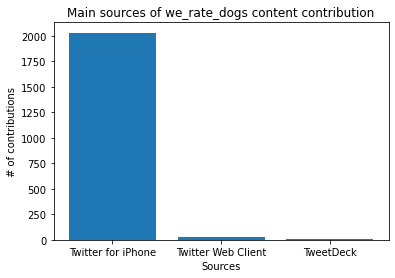

In [111]:
bin_names = ['Twitter for iPhone','Twitter Web Client','TweetDeck']
location = ['1','2','3']
plt.bar(location, source_values, tick_label=bin_names)
plt.title('Main sources of we_rate_dogs content contribution')
plt.xlabel('Sources')
plt.ylabel('# of contributions');

In [131]:
total = sum(source_values)
f1 = 'The distribution of sources is highly unequal, the {}% of the contributions were done by Twitter for iphone. \n'.format(round(float((source_values[0]/total)*100),0))
f2 = 'The contributions made on {} are {} while {} has only {} contributions'.format(bin_names[1],source_values[1],
                                                                                    bin_names[2],source_values[2])
print(f1, f2)

The distribution of sources is highly unequal, the 98.0% of the contributions were done by Twitter for iphone. 
 The contributions made on Twitter Web Client are 30 while TweetDeck has only 11 contributions


##### Insigth
As we can see, the main source by a huge difference (98% of the total) is those were the client is using an iphone. 
From this, we can presunt that iPhone users are more interested in the content of the user than the rest of twitter population.

#### Most famous breed

For this analysis we are going to use the image recognition P1; it would help us to find wich breed is the most tweeted. 
We are going to focus in the 15 most tweetd breeds to make easier the analysis.
It is important to say all doggos are equally good doggos and this analysis is not trying to show otherwise

In [146]:
master['p1'].value_counts()[:15]

golden_retriever            150
labrador_retriever          100
pembroke                     88
chihuahua                    83
pug                          57
chow                         44
samoyed                      43
toy_poodle                   39
pomeranian                   38
malamute                     30
cocker_spaniel               30
french_bulldog               26
miniature_pinscher           23
chesapeake_bay_retriever     23
seat_belt                    22
Name: p1, dtype: int64

The 15th value is not a dog breed :(, so we are going to take the first 14 instead.

In [145]:
breed_values = []
for i in range(14):
    a = master['p1'].value_counts()[i]
    breed_values.append(a)
print(breed_values)

[150, 100, 88, 83, 57, 44, 43, 39, 38, 30, 30, 26, 23, 23]


In [171]:
dd = master['p1'].value_counts()
breed= []
for i in breed_values:
    a = dd[dd == i].index
    breed.append(a[0])
print(breed)

['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua', 'pug', 'chow', 'samoyed', 'toy_poodle', 'pomeranian', 'malamute', 'malamute', 'french_bulldog', 'miniature_pinscher', 'miniature_pinscher']


In [176]:
#The loop had some duplicated values that i had to repare manually
breed[10] = 'cocker_spaniel'
breed[13] = 'chesapeake_bay_retriever'
print(breed)

['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua', 'pug', 'chow', 'samoyed', 'toy_poodle', 'pomeranian', 'malamute', 'cocker_spaniel', 'french_bulldog', 'miniature_pinscher', 'chesapeake_bay_retriever']


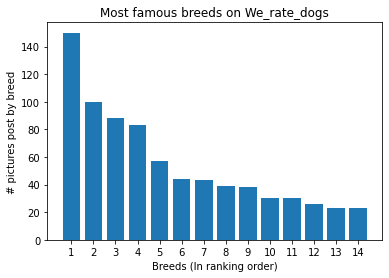

In [182]:
location = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
plt.bar(location, breed_values)
plt.title('Most famous breeds on We_rate_dogs')
plt.xlabel('Breeds (In ranking order)', fontsize=10)
plt.ylabel('# pictures post by breed');

The Golden retriever is the dog who appears the most in We_Rate_Dogs pictures with 50 pictures more than the second place: Labrador retriver.
In third place with 88 pictures we have the Pembroke

In [203]:
sd = master[master.p1 == 'golden_retriever']
sd['jpg_url'].head(1)

14    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
Name: jpg_url, dtype: object

##### A picture of the popularity contest winner

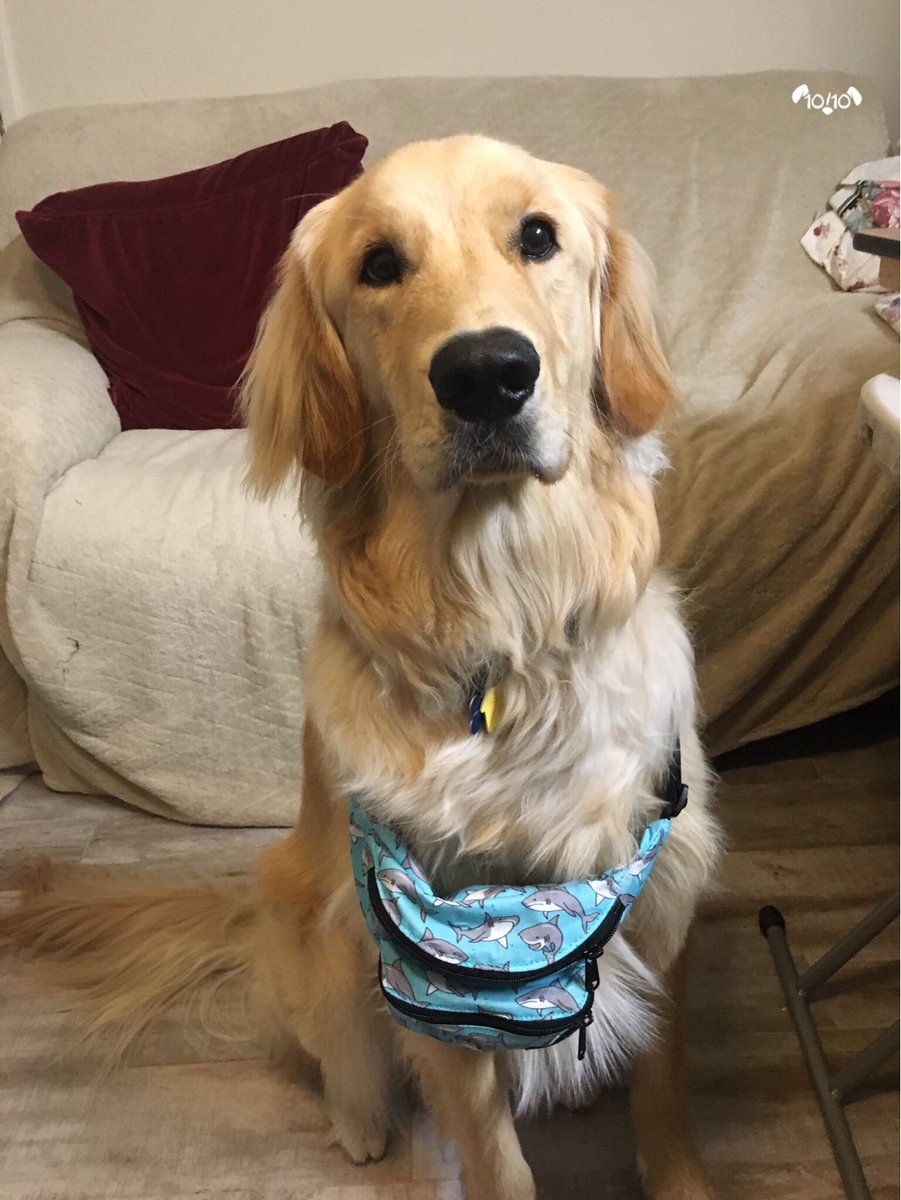

In [202]:
Image(url='https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg', embed=True)

#### Most rated breed

There is a difference between being famous and being popular, we already find out that golden retrievers are the most posted doggos on We rate dogs, this doesn't neccesarily mean that they are the most rated on Twitter. We can see who is the favorite doggo of the town. 

In [210]:
#First i'm going to calculate the ratio of the rating
master['pop_rate'] = master['rating_numerator']/master['rating_denominator']
master.head(1)

,created_at,tweet_id,is_quote_status,retweet_count,favorite_count,favorited,retweeted,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo_type,tweet_url,pop_rate
0,2017-08-01 00:00:00,892420643555336193,False,8853,39467,False,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://t.co/MgUWQ76dJU,1.3


In [209]:
pp = master.groupby('p1')['pop_rate'].mean()
print(pp.sort_values(ascending=False)[:10])

p1
bow_tie                        45.150000
microphone                     42.000000
lakeside                       10.800000
clumber                         2.700000
soft-coated_wheaten_terrier     2.545455
teddy                           1.811111
west_highland_white_terrier     1.564286
great_pyrenees                  1.492857
borzoi                          1.444444
pedestal                        1.400000
Name: pop_rate, dtype: float64


It looks like the image identifier is not working as expected and the top 3 are charactheristics instead of breeds, but we can substract from it the top 5 breeds and create a plot to see their popularity

In [220]:
pop_breeds = ['clumber','wheaten_terrier','teddy', 'whiteTerrier','  great pyrenees']
pop_rates = [2.7, 2.54,1.8,1.56,1.49]

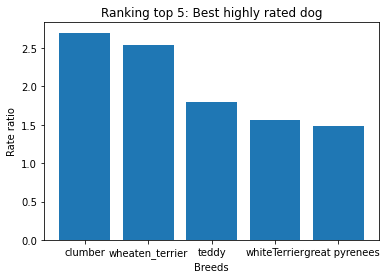

In [227]:
location = ['1','2','3','4','5']
plt.bar(location, pop_rates, tick_label=pop_breeds)
plt.title('Ranking top 5: Best highly rated dog')
plt.xlabel('Breeds')
plt.ylabel('Rate ratio');

In [223]:
ds = master[master.p1 == 'clumber']
ds['jpg_url'].head(1)

614    https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
Name: jpg_url, dtype: object

The Clumber has the best ratio of all doggos, so we can say golden retriever is the most popular but the clumber the goodest boy

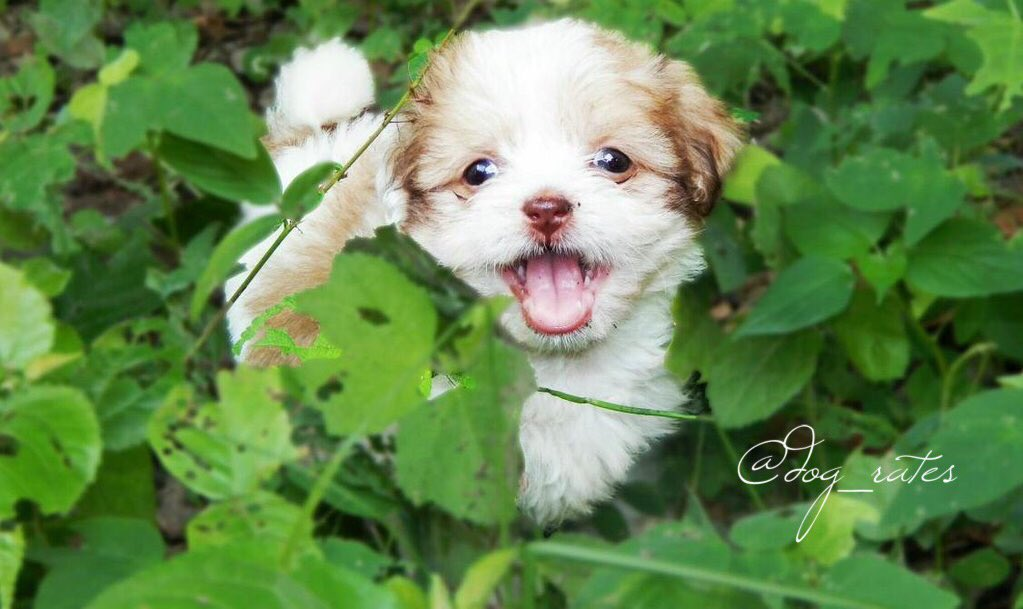

In [224]:
Image(url='https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg', embed=True)

- UDACITY Data foundamentals classes
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
- http://www.loc.gov/standards/iso639-2/php/code_list.php
- https://regex101.com/
- https://www.geeksforgeeks.org/convert-floats-to-integers-in-a-pandas-dataframe/
- https://datascience.stackexchange.com/questions/15924/how-can-i-fill-nan-values-in-a-pandas-dataframe-in-python
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.islower.html#pandas.Series.str.islower
- https://stackoverflow.com/questions/15325182/how-to-filter-rows-in-pandas-by-regex
- https://www.youtube.com/watch?v=rhzKDrUiJVk
- https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
-https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html?highlight=display#IPython.display.Image